<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Quantile_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Quantile regression

When to Use: 
	

* When there are outliers in data
* High skewness in data
* When heteroscedastic exist in data   
* Assumption of Linear regression is not satisfied 

Advantages:


*   Robust to outlier
*   Better Fit for not much good data 
*   Fits in heteroscedastic data and skewed data also
	
i have used house data set from kaggle and i have used statemodels to implement Quant regression.





In [23]:


%matplotlib inline

from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg



In [24]:
from google.colab import drive

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/"My Drive/Colab Notebooks/Quantile regression"

/content/drive/My Drive/Colab Notebooks/Quantile regression


In [27]:
# reading dataset and taking information 
house_dataset = pd.read_csv("MagicBricks.csv")
print(house_dataset)
house_dataset.info()


          Area  BHK  Bathroom  ...   Transaction           Type  Per_Sqft
0     800.0000    3       2.0  ...  New_Property  Builder_Floor       NaN
1     750.0000    2       2.0  ...  New_Property      Apartment    6667.0
2     950.0000    2       2.0  ...        Resale      Apartment    6667.0
3     600.0000    2       2.0  ...        Resale  Builder_Floor    6667.0
4     650.0000    2       2.0  ...  New_Property  Builder_Floor    6667.0
..         ...  ...       ...  ...           ...            ...       ...
893   198.0000    1       1.0  ...        Resale      Apartment    5051.0
894  4900.0000    1       1.0  ...  New_Property      Apartment    5051.0
895  2077.4327    1       1.0  ...        Resale  Builder_Floor    5051.0
896    50.0000    1       1.0  ...  New_Property      Apartment    5051.0
897   990.0000    3       2.0  ...        Resale  Builder_Floor    5051.0

[898 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (t

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


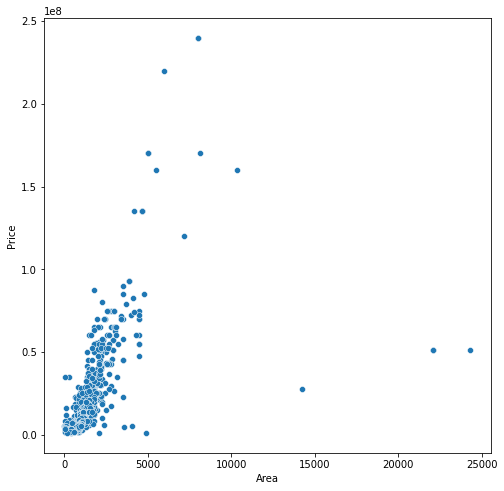

In [28]:
# ploting scatterplot of house price v/s Are 
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
sns.scatterplot(house_dataset['Area'],house_dataset['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


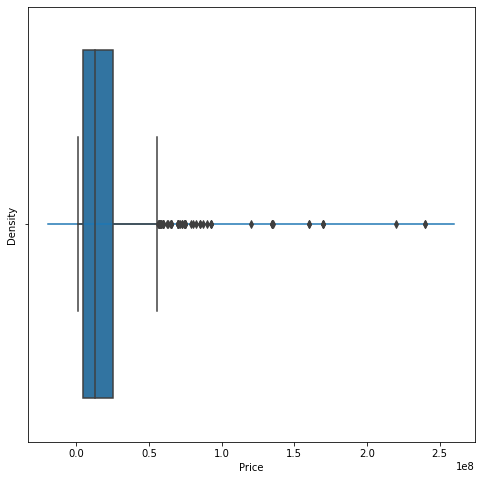

In [29]:
#checking skreweed datas & boxplot
sns.distplot(house_dataset['Price'])
sns.boxplot(house_dataset['Price'])

In [30]:
mod = smf.quantreg('Price ~ Area', house_dataset)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3760
Model:                       QuantReg   Bandwidth:                   3.827e+06
Method:                 Least Squares   Sparsity:                    1.666e+07
Date:                Fri, 19 Feb 2021   No. Observations:                  898
Time:                        05:21:35   Df Residuals:                      896
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.731e+06   3.68e+05    -15.573      0.000   -6.45e+06   -5.01e+06
Area        1.738e+04    167.257    103.939      0.000    1.71e+04    1.77e+04

The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [31]:
quantiles = np.arange(.05, .96, .1)

def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Area']] + res.conf_int().loc['Area'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns = ['q', 'a', 'b', 'lb', 'ub'])
ols = smf.ols('Price ~ Area', house_dataset).fit()
ols_ci = ols.conf_int().loc['Area'].tolist()
ols = dict(a = ols.params['Intercept'], 
          b = ols.params['Area'],
          lb = ols_ci[0], 
          ub = ols_ci[1])
print(models)
print(ols)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      q             a             b            lb            ub
0  0.05  9.584746e+05   2059.322034   1575.282826   2543.361242
1  0.15  3.910714e-05   5000.000000   4505.148395   5494.851605
2  0.25 -2.871622e+06  10225.225225   9879.067876  10571.382574
3  0.35 -4.324607e+06  13089.005237  12771.571078  13406.439396
4  0.45 -5.387692e+06  15979.487193  15648.637641  16310.336745
5  0.55 -5.871747e+06  18249.070632  17930.027418  18568.113846
6  0.65 -6.862934e+06  21389.961390  21067.707903  21712.214877
7  0.75 -6.530786e+06  22916.530278  22582.795613  23250.264944
8  0.85 -7.017401e+06  27030.162421  26552.985388  27507.339453
9  0.95 -1.063054e+06  30132.881709  28388.933983  31876.829436
{'a': 7068772.142856232, 'b': 9123.440915025842, 'lb': 8289.275738563389, 'ub': 9957.606091488295}


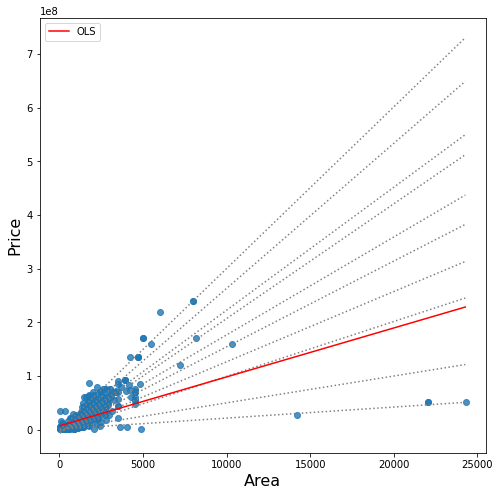

In [32]:
x = np.arange(house_dataset.Area.min(), house_dataset.Area.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8,8))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle = 'dotted', color = 'grey')
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(house_dataset.Area,house_dataset.Price, alpha=0.8)
legend = ax.legend()
ax.set_xlabel('Area', fontsize = 16)
ax.set_ylabel('Price', fontsize = 16);

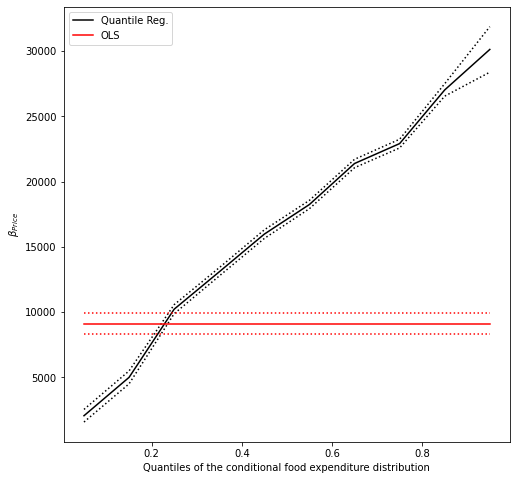

In [33]:


n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, color='black', linestyle='dotted')
p3 = plt.plot(models.q, models.lb, color='black', linestyle='dotted')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
P5 = plt.plot(models.q, [ols['lb']] * n, color='red', linestyle='dotted')
p6 = plt.plot(models.q, [ols['ub']] * n, color='red', linestyle='dotted')
plt.ylabel(r'$\beta_{Price}$')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show();

